In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

#Pipeline
from sklearn.pipeline import Pipeline, FeatureUnion

#Cross validation
from sklearn.model_selection import cross_val_score

In [2]:
#load data

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [4]:
#Minimum exploratory data analysis (mostly is already explored on excellent blog entries about the competition)

In [5]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [6]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
corr_matrix = train_df.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

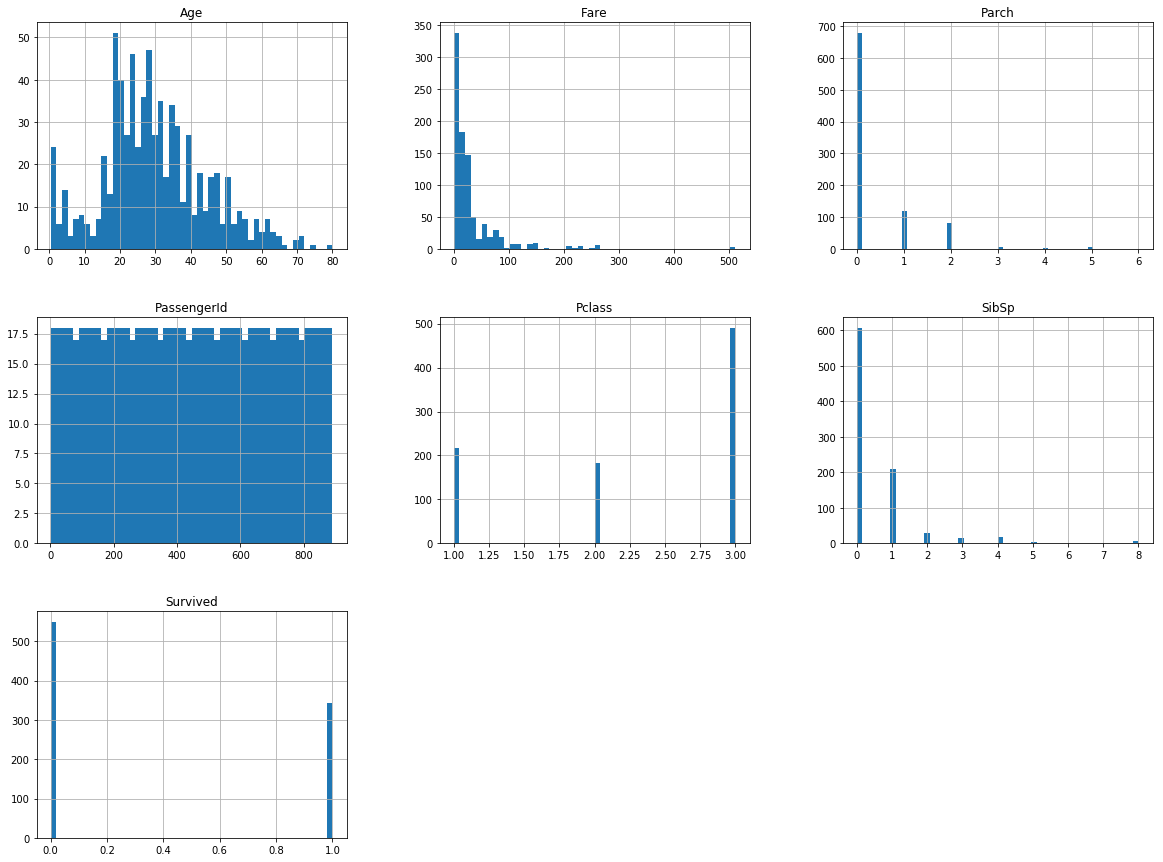

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
train_df.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
#Feature Torturing
#
#
#

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [12]:
# fill missing embarkation port
from sklearn.base import TransformerMixin

class FillPort(TransformerMixin):
    def fit(self, X, y=None):
        self.most_common_port=X.Embarked.dropna().mode()[0]
        return self
    def transform(self, X):
        X["Embarked"].fillna(self.most_common_port,inplace=True)
        return X



In [13]:
# fill missing fare - only one in the test set... really not well thought function
from sklearn.base import TransformerMixin

class FillFare(TransformerMixin):
    def fit(self, X, y=None):
        self.fare=11.00205
        return self
    def transform(self, X):
        X["Fare"].fillna(self.fare,inplace=True)
        return X

#print(test_df.loc[test_df["Fare"].isnull()])

#Calculate fare for the missing fare in the test set

#temp1=test_df.loc[test_df["Pclass"]==3]
#temp2=temp1.loc[temp1["Embarked"]=="S"]
#temp3=temp2.loc[temp2["Age"]>40]
#print(temp3.median())



In [14]:
# change Pclass
from sklearn.base import TransformerMixin

class ChangePclass(TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        tag=pd.get_dummies(X["Pclass"],prefix="Pclass")
        X=pd.concat([X,tag], axis=1)
        return X.drop("Pclass", axis=1)


In [15]:
# change embarked
from sklearn.base import TransformerMixin

class ChangeEmbarked(TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        tag=pd.get_dummies(X["Embarked"],prefix="Embarked")
        X=pd.concat([X,tag], axis=1)
        return X.drop("Embarked", axis=1)
        



In [16]:
# change sex from string to numeric
from sklearn.base import TransformerMixin

class ChangeSex(TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X.iloc[:]["Sex"]=X.iloc[:]["Sex"].map({"male":1,"female":0})
        return X

In [17]:
# change name
from sklearn.base import TransformerMixin

class ChangeName(TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X["Title"]=X["Name"].map(lambda name:name.split(',')[1].split('.')[0].strip())
        Title_Dictionary = {
            "Capt":       "Crew",
            "Col":        "Crew",
            "Major":      "Crew",
            "Jonkheer":   "Rare",
            "Don":        "Rare",
            "Sir" :       "Rare",
            "Dr":         "Crew",
            "Rev":        "Crew",
            "the Countess":"Rare",
            "Dona":       "Rare",
            "Mme":        "Mrs",
            "Mlle":       "Miss",
            "Ms":         "Mrs",
            "Mr" :        "Mr",
            "Mrs" :       "Mrs",
            "Miss" :      "Miss",
            "Master" :    "Master",
            "Lady" :      "Rare"
        }
        X["Title"]=X.Title.map(Title_Dictionary)
        tag=pd.get_dummies(X["Title"],prefix="Title")
        X=pd.concat([X,tag], axis=1)
        return X.drop("Name", axis=1).drop("Title", axis=1)
        
    


In [18]:
# change ticket
from sklearn.base import TransformerMixin

class ChangeTicket(TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):

        # a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
        def cleanTicket(ticket):
            ticket = ticket.replace('.','')
            ticket = ticket.replace('/','')
            ticket = ticket.split()
            ticket = list(ticket)
            ticket = map(lambda t : t.strip() , ticket)
            ticket = list(ticket)
            ticket = filter(lambda t : not t.isdigit(), ticket)
            ticket = list(ticket)
            if len(ticket) > 0:
                return ticket[0]
            else: 
                return 'XXX'
        
        X["Ticket"]=X["Ticket"].map(cleanTicket)
        tag=pd.get_dummies(X["Ticket"],prefix="Ticket")
        X=pd.concat([X,tag], axis=1)
        return X.drop("Ticket",axis=1)
        

    

In [19]:
# change cabin
from sklearn.base import TransformerMixin

class ChangeCabin(TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X["Cabin"].fillna("U", inplace=True)
        X["Cabin"]=X["Cabin"].map(lambda c : c[0])
        tag=pd.get_dummies(X["Cabin"], prefix="Cabin")
        X=pd.concat([X,tag], axis=1)
        return X.drop("Cabin", axis=1)
        




In [20]:
# create family parameters
from sklearn.base import TransformerMixin

class CreateFamily(TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X["FamilySize"]=X["SibSp"]+X["Parch"]+1
        X["Alone"]=X["FamilySize"].map(lambda s : 1 if s == 1 else 0)
        X["NormalFamily"]=X["FamilySize"].map(lambda s : 1 if 2<=s<=4 else 0)
        X["LargeFamily"]=X["FamilySize"].map(lambda s : 1 if 5<=s else 0)
        return X
 

In [21]:
# fill missing Age with Regressor (must be last - regressor needs numeric attribs)
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

class ChangeAge(BaseEstimator, TransformerMixin):
    def __init__(self):
        #self.model = LinearRegression()
        self.model = RandomForestRegressor() 
        #self.model = KNeighborsRegressor(n_neighbors=3) 
    def fit(self, X, y=None):
        self.X_withage=X.loc[X["Age"].notnull()]
        y=self.X_withage["Age"]
        X_clear=self.X_withage.drop("Age", axis=1)
        if "Survived" in X_clear.columns:
            X_clear=X_clear.drop("Survived", axis=1)
        self.model.fit(X_clear, y)
        #acc=(cross_val_score(self.model, X_clear, y, cv=5, scoring="accuracy").mean()) * 100
        #print(acc)
        return self
    def transform(self, X):
        X_to_replace=X.drop("Age", axis=1)
        X_to_replace_clear=X_to_replace
        if "Survived" in X_to_replace_clear.columns:
            X_to_replace_clear=X_to_replace_clear.drop("Survived", axis=1)
        y_to_replace=pd.DataFrame(self.model.predict(X_to_replace_clear))
        y_to_replace.columns=["Age"]
        X_to_replace["Age"]=X[:]["Age"].fillna(y_to_replace[:]["Age"]) #is there a way to write this clearly?
        return X_to_replace
        

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [23]:
feature_engineering_pipeline = Pipeline([
    ('fill_port', FillPort()),
    ('fill_fare', FillFare()),
    ('change_embarked', ChangeEmbarked()),
    ('change_pclass', ChangePclass()),
    ('change_sex', ChangeSex()),
    ('change_name', ChangeName()),
    ('change_ticket', ChangeTicket()),
    ('change_cabin', ChangeCabin()),
    ('create_family', CreateFamily()),
    ('change_age', ChangeAge()),
])



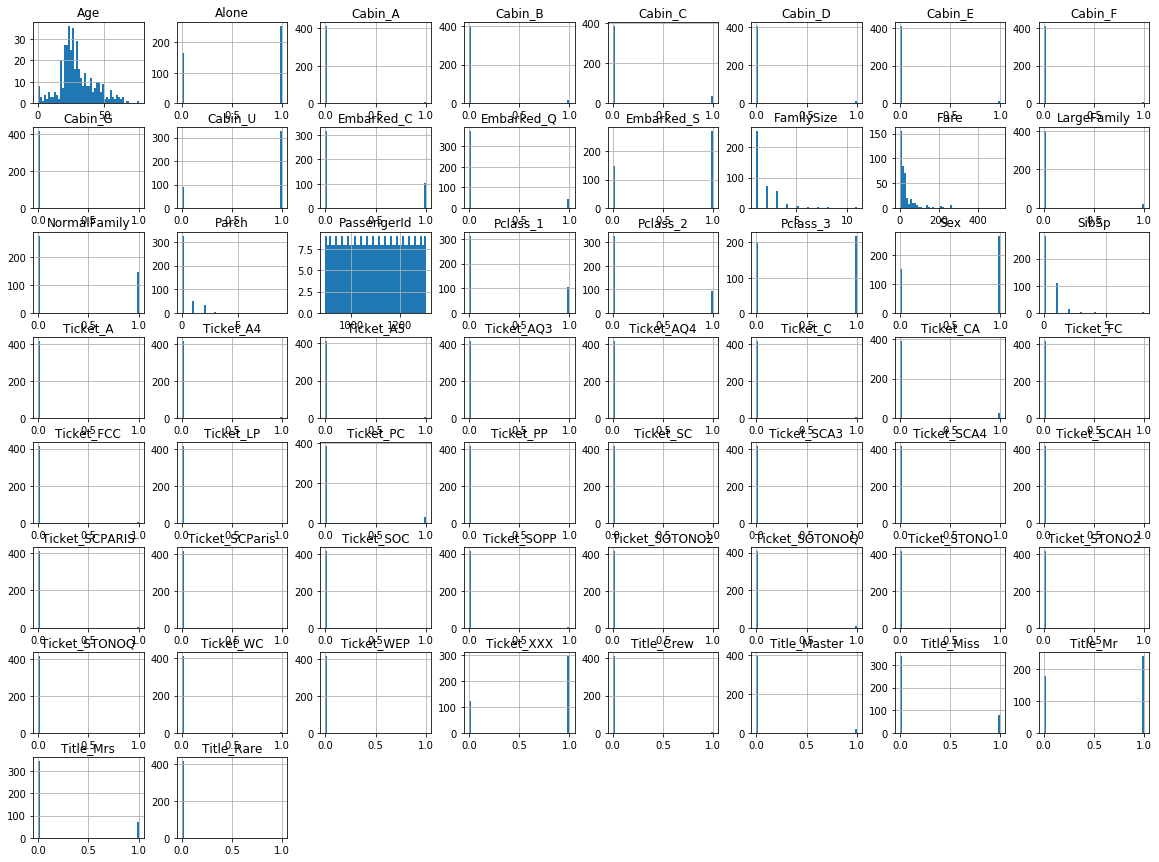

In [24]:
train_df_tr=pd.DataFrame(feature_engineering_pipeline.fit_transform(train_df))
test_df_tr=pd.DataFrame(feature_engineering_pipeline.fit_transform(test_df))

test_df_tr.hist(bins=50, figsize=(20,15))
plt.show()
#train_df_tr.describe()


In [25]:
# Feature selection




In [26]:
# Create a combined dataset (train + test) to check features a do age regression
combined=pd.concat([train_df.drop("Survived",axis=1), test_df], axis=0)
combined_tr=pd.DataFrame(feature_engineering_pipeline.fit_transform(combined))
#combined_tr.info()

In [27]:
X_train = combined_tr[0:891]
X_test = combined_tr[891:]
Y_train = train_df_tr["Survived"]


In [28]:
X_train.shape, Y_train.shape, X_test.shape

((891, 68), (891,), (418, 68))

In [29]:
# Use Extra Trees to find feature importance
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

parameter_grid_selection = {
    'max_depth' : [4, 6, 8],
    'n_estimators': [10, 50,100,200],
    'min_samples_split': [2, 3, 10],
    'min_samples_leaf': [1, 3, 10],
    'bootstrap': [True, False],
}

clf = ExtraTreesClassifier(n_estimators=200)
#grid_selection=GridSearchCV(estimator=clf, param_grid=parameter_grid_selection, cv=5, scoring="accuracy")
#%time grid_selection = grid_selection.fit(X_train, Y_train)
# Selected parameters are in the commented line in the next cell
#print('Best score: {}'.format(grid_selection.best_score_))
#print('Best parameters: {}'.format(grid_selection.best_params_))


In [30]:
#clf = ExtraTreesClassifier(bootstrap=False, max_depth=8, min_samples_leaf=3, min_samples_split=2, n_estimators=50)

clf.fit(X_train, Y_train)

features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(['importance'],ascending=False)


,feature,importance
67,Age,0.128564
0,PassengerId,0.122322
4,Fare,0.111227
1,Sex,0.107741
14,Title_Mr,0.103445
13,Title_Miss,0.044079
15,Title_Mrs,0.042204
10,Pclass_3,0.036690
62,Cabin_U,0.026437
8,Pclass_1,0.021803


In [31]:
model = SelectFromModel(clf, prefit=True)
X_train_selected = model.transform(X_train)
X_train_selected.shape

(891, 14)

In [32]:
X_test_selected = model.transform(X_test)
X_test_selected.shape

(418, 14)

In [33]:
# Fit different models and record accuracy in cross validation

In [34]:

X_train_selected.shape, Y_train.shape, X_test_selected.shape

((891, 14), (891,), (418, 14))

In [35]:
#feature scaling

from sklearn.preprocessing import StandardScaler, RobustScaler

scaler=StandardScaler()

X_train = scaler.fit_transform(X_train_selected)
X_test = scaler.fit_transform(X_test_selected)


In [36]:
#Models review


In [37]:
# Logistic Regression

parameter_grid = [
  {'C': [0.1, 0.3, 1, 3,10], 'multi_class': ['multinomial'], 'solver': ['lbfgs']},
  {'C': [0.1, 0.3, 1, 3,10], 'multi_class': ['ovr'], 'solver': ['liblinear']},
 ]

logreg = LogisticRegression()
grid=GridSearchCV(estimator=logreg, param_grid=parameter_grid, cv=5, scoring="accuracy")
%time grid.fit(X_train, Y_train)
Y_pred=grid.predict(X_test)
#%time logreg.fit(X_train, Y_train)
#Y_pred = logreg.predict(X_test)
acc_log = (cross_val_score(logreg, X_train, Y_train, cv=5, scoring="accuracy").mean()) * 100

print (acc_log)
print('Best score: {}'.format(grid.best_score_))
print('Best parameters: {}'.format(grid.best_params_))
acc_log1 = grid.best_score_*100
acc_log_params=grid.best_params_


Wall time: 482 ms
82.4892660332
Best score: 0.8271604938271605
Best parameters: {'C': 1, 'multi_class': 'multinomial', 'solver': 'lbfgs'}


In [38]:
# Support Vector Machines

parameter_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]


# svc = SVC(probability=True)
# grid=GridSearchCV(estimator=svc, param_grid=parameter_grid, cv=5, scoring="accuracy")
# %time grid.fit(X_train, Y_train)
# Y_pred=grid.predict(X_test)
# Predict parameters {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
svc = SVC(C=1000, gamma= 0.001, kernel='rbf', probability=True)
%time svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
%time acc_svc = (cross_val_score(svc, X_train, Y_train, cv=5, scoring="accuracy").mean()) * 100

print(acc_svc)
#print('Best score: {}'.format(grid.best_score_))
#print('Best parameters: {}'.format(grid.best_params_))
#acc_svc1 = grid.best_score_*100
#acc_svc_params=grid.best_params_


Wall time: 358 ms
Wall time: 1.02 s
82.8269865774


In [39]:
# K-Nearest Neighbors

parameter_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8],
}
  

knn = KNeighborsClassifier(n_neighbors = 3)
grid=GridSearchCV(estimator=knn, param_grid=parameter_grid, cv=5, scoring="accuracy")
%time grid.fit(X_train, Y_train)
Y_pred=grid.predict(X_test)
#%time knn.fit(X_train, Y_train)
#Y_pred = knn.predict(X_test)
acc_knn = (cross_val_score(knn, X_train, Y_train, cv=5, scoring="accuracy").mean()) * 100

print(acc_knn)
print('Best score: {}'.format(grid.best_score_))
print('Best parameters: {}'.format(grid.best_params_))
acc_knn1 = grid.best_score_*100
acc_knn_params=grid.best_params_



Wall time: 519 ms
80.4787347413
Best score: 0.8204264870931538
Best parameters: {'n_neighbors': 8}


In [40]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
%time gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = (cross_val_score(gaussian, X_train, Y_train, cv=5, scoring="accuracy").mean()) * 100
acc_gaussian

Wall time: 2 ms


79.356993985715945

In [41]:
# Linear SVC

linear_svc = LinearSVC()
%time linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = (cross_val_score(linear_svc, X_train, Y_train, cv=5, scoring="accuracy").mean()) * 100
acc_linear_svc

Wall time: 90.9 ms


82.379431496066886

In [42]:
# Stochastic Gradient Descent

parameter_grid={
'loss': ["hinge", "log", "modified_huber","perceptron","squared_hinge"],
'learning_rate': ["constant","optimal","invscaling"],
'alpha': [0.0001, 0.0003, 0.001, 0.003, 0.01,0.03,0.1,0.3,1 ],
'penalty': ["None", "l2", "l1","elasticnet"]
}


sgd = SGDClassifier(max_iter=4000, tol=1e-3, eta0=0.0001)
grid=GridSearchCV(estimator=sgd, param_grid=parameter_grid, cv=5, scoring="accuracy")
%time grid.fit(X_train, Y_train)
Y_pred=grid.predict(X_test)
#%time sgd.fit(X_train, Y_train)
#Y_pred = sgd.predict(X_test)
acc_sgd = (cross_val_score(sgd, X_train, Y_train, cv=5, scoring="accuracy").mean()) * 100

print(acc_sgd)
print('Best score: {}'.format(grid.best_score_))
print('Best parameters: {}'.format(grid.best_params_))
acc_sgd1 = grid.best_score_*100
acc_sgd_params=grid.best_params_


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:451: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:451: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:451: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:451: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:451: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:451: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:451: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:451: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  

Wall time: 15.4 s
78.4517908622
Best score: 0.8282828282828283
Best parameters: {'alpha': 0.1, 'learning_rate': 'optimal', 'loss': 'hinge', 'penalty': 'l2'}


In [43]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
%time decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = (cross_val_score(decision_tree, X_train, Y_train, cv=5, scoring="accuracy").mean()) * 100
acc_decision_tree

Wall time: 4.03 ms


73.307154050997482

In [44]:
#MLPClassifier

parameter_grid={
'learning_rate': ["constant", "invscaling", "adaptive"],
'hidden_layer_sizes': [(14,4,1), (14,14,1)],
'alpha': [0.001, 0.03, 0.01 ],
'solver' : ["adam", "sgd", "lbfgs"],
'activation': ["logistic", "relu", "tanh"]
}


MLP = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(14,4,1), activation='tanh',alpha=0.03,learning_rate='invscaling',batch_size=400, max_iter=4000, early_stopping=True)
grid=GridSearchCV(estimator=MLP, param_grid=parameter_grid, cv=5, scoring="accuracy")
%time grid.fit(X_train, Y_train)
Y_pred=grid.predict(X_test)
#%time MLP.fit(X_train, Y_train)
#Y_pred = MLP.predict(X_test)
acc_mlp = (cross_val_score(MLP, X_train, Y_train, cv=5, scoring="accuracy").mean()) * 100

print(acc_mlp)
print('Best score: {}'.format(grid.best_score_))
print('Best parameters: {}'.format(grid.best_params_))
acc_mlp1 = grid.best_score_*100
acc_mlp_params=grid.best_params_


Wall time: 10min 40s
74.1883128052
Best score: 0.7968574635241302
Best parameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (14, 4, 1), 'learning_rate': 'invscaling', 'solver': 'lbfgs'}


In [45]:
# Random Forest

parameter_grid = {
    'max_depth': [4, 5, 6, 7, 8],
    'n_estimators': [200,210,240,250],
    'criterion': ['gini', 'entropy'],
}

random_forest = RandomForestClassifier()
grid=GridSearchCV(estimator=random_forest, param_grid=parameter_grid, cv=5, scoring="accuracy")
%time grid.fit(X_train, Y_train)
Y_pred=grid.predict(X_test)
#%time random_forest.fit(X_train, Y_train)
#Y_pred = random_forest.predict(X_test)
acc_random_forest = (cross_val_score(random_forest, X_train, Y_train, cv=5, scoring="accuracy").mean()) * 100

print(acc_random_forest)
print('Best score: {}'.format(grid.best_score_))
print('Best parameters: {}'.format(grid.best_params_))
acc_random_forest1 = grid.best_score_*100
acc_random_forest_params=grid.best_params_



Wall time: 1min 16s
80.0330698737
Best score: 0.8316498316498316
Best parameters: {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 210}


In [46]:
# Extra Trees

parameter_grid = {
    'max_depth': [4, 5, 6, 7, 8],
    'n_estimators': [200,210,240,250],
    'criterion': ['gini', 'entropy'],
}

extra_trees = ExtraTreesClassifier()
grid=GridSearchCV(estimator=extra_trees, param_grid=parameter_grid, cv=5, scoring="accuracy")
%time grid.fit(X_train, Y_train)
Y_pred=grid.predict(X_test)
#%time extra_trees.fit(X_train, Y_train)
#Y_pred = extra_trees.predict(X_test)
acc_extra_trees = (cross_val_score(extra_trees, X_train, Y_train, cv=5, scoring="accuracy").mean()) * 100

print(acc_extra_trees)
print('Best score: {}'.format(grid.best_score_))
print('Best parameters: {}'.format(grid.best_params_))
acc_extra_trees1 = grid.best_score_*100
acc_extra_trees_params=grid.best_params_



Wall time: 1min
80.5923567986
Best score: 0.8327721661054994
Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 250}


In [47]:
# Gradient Boosting

parameter_grid = {
    'max_depth': [4, 5, 6, 7, 8],
    'n_estimators': [200,210,240,250],
    'criterion': ['friedman_mse', 'mse','mae'],
}

gradient_boosting = GradientBoostingClassifier()
grid=GridSearchCV(estimator=gradient_boosting, param_grid=parameter_grid, cv=5, scoring="accuracy")
%time grid.fit(X_train, Y_train)
Y_pred=grid.predict(X_test)
#%time gradient_boosting.fit(X_train, Y_train)
#Y_pred = gradient_boosting.predict(X_test)
acc_gradient_boosting = (cross_val_score(gradient_boosting, X_train, Y_train, cv=5, scoring="accuracy").mean()) * 100

print(acc_gradient_boosting)
print('Best score: {}'.format(grid.best_score_))
print('Best parameters: {}'.format(grid.best_params_))
acc_gradient_boosting1 = grid.best_score_*100
acc_gradient_boosting_params=grid.best_params_


Wall time: 11min 51s
79.038189764
Best score: 0.7901234567901234
Best parameters: {'criterion': 'friedman_mse', 'max_depth': 4, 'n_estimators': 210}


### Model evaluation

We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set. 

In [48]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Gaussian Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'MLP', 'Gradient Boosting','Extra Trees'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, 
              acc_sgd, acc_linear_svc, acc_decision_tree, acc_mlp, acc_gradient_boosting,acc_extra_trees],
    'Score1': [acc_svc, acc_knn1, acc_log1, 
              acc_random_forest1, acc_gaussian, 
              acc_sgd1, acc_linear_svc, acc_decision_tree, acc_mlp1, acc_gradient_boosting1,acc_extra_trees1]})
models.sort_values(by='Score1', ascending=False)

,Model,Score,Score1
10,Extra Trees,80.592357,83.277217
3,Random Forest,80.033070,83.164983
5,Stochastic Gradient Decent,78.451791,82.828283
0,Support Vector Machines,82.826987,82.826987
2,Logistic Regression,82.489266,82.716049
6,Linear SVC,82.379431,82.379431
1,KNN,80.478735,82.042649
8,MLP,74.188313,79.685746
4,Gaussian Naive Bayes,79.356994,79.356994
9,Gradient Boosting,79.038190,79.012346


In [58]:
# Ensemble of the "tuned" top models

classifiers=[
    ('svc', SVC(C=1000, gamma=0.001, probability=True, kernel='rbf')),
    ('linear_svc', SVC(kernel='linear', probability=True)),
    ('sgd', SGDClassifier(max_iter=1000, tol=1e-3, alpha=0.1,learning_rate='optimal',loss='modified_huber', penalty='l2')),
    ('gb', GradientBoostingClassifier(criterion='friedman_mse',max_depth=4,n_estimators=240)),
    ('lr', LogisticRegression(C=0.3,multi_class='multinomial', solver='lbfgs')),
    ('knn', KNeighborsClassifier(n_neighbors = 8)),
    ('mlp', MLPClassifier(solver='lbfgs', hidden_layer_sizes=(14,4,1), alpha=0.001, activation='tanh',learning_rate='adaptive')),
    ('ef', ExtraTreesClassifier(criterion='entropy',max_depth=5,n_estimators=240)),
    ('rf', RandomForestClassifier(criterion='gini',max_depth=4,n_estimators=240)),
]

    
voting=VotingClassifier(classifiers,voting="soft")
%time voting.fit(X_train, Y_train)
Y_pred=voting.predict(X_test)
%time acc_grid_search = (cross_val_score(voting, X_train, Y_train, cv=5, scoring="accuracy").mean()) * 100

print(acc_grid_search)


Wall time: 1.36 s
Wall time: 6.04 s
83.2789568858


In [59]:
# Submission

# He didn't confess yet, but he will...



In [60]:
submission = pd.DataFrame({
        "PassengerId": test_df_tr["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)